In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import LowessSmoother
import skfda
from skfda.representation.interpolation import SplineInterpolation
from sklearn.preprocessing import normalize

# Andiamo ad aprire le bande dei campi 4 e 6

In [12]:
with open('./pickles/campo4_bande.pickle', 'rb') as handle:
    campo4 = pickle.load(handle)
with open('./pickles/campo6_bande.pickle', 'rb') as handle:
    campo6 = pickle.load(handle)

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)

print(campo4.shape)
print(campo6.shape)

(57, 12, 43, 74)
(57, 12, 52, 84)


In [25]:
Allpixelndvi4 = (campo4[:,7,:,:]-campo4[:,3,:,:])/(campo4[:,7,:,:]+campo4[:,3,:,:])

Allpixelndre4 = (campo4[:,7,:,:]-campo4[:,4,:,:])/(campo4[:,7,:,:]+campo4[:,4,:,:])

Allpixelndvi6 = (campo6[:,7,:,:]-campo6[:,3,:,:])/(campo6[:,7,:,:]+campo6[:,3,:,:])

Allpixelndre6 = (campo6[:,7,:,:]-campo6[:,4,:,:])/(campo6[:,7,:,:]+campo6[:,4,:,:])

NDVI_cut_4 = Allpixelndvi4[18:50,:,:]
NDRE_cut_4 = Allpixelndre4[18:50,:,:]
NDVI_cut_6 = Allpixelndvi6[18:50,:,:]
NDRE_cut_6 = Allpixelndre6[18:50,:,:]

C:\Users\pc\AppData\Local\Temp\ipykernel_10808\4022297960.py:1: RuntimeWarning: invalid value encountered in divide
  Allpixelndvi4 = (campo4[:,7,:,:]-campo4[:,3,:,:])/(campo4[:,7,:,:]+campo4[:,3,:,:])
C:\Users\pc\AppData\Local\Temp\ipykernel_10808\4022297960.py:3: RuntimeWarning: invalid value encountered in divide
  Allpixelndre4 = (campo4[:,7,:,:]-campo4[:,4,:,:])/(campo4[:,7,:,:]+campo4[:,4,:,:])
C:\Users\pc\AppData\Local\Temp\ipykernel_10808\4022297960.py:5: RuntimeWarning: invalid value encountered in divide
  Allpixelndvi6 = (campo6[:,7,:,:]-campo6[:,3,:,:])/(campo6[:,7,:,:]+campo6[:,3,:,:])
C:\Users\pc\AppData\Local\Temp\ipykernel_10808\4022297960.py:7: RuntimeWarning: invalid value encountered in divide
  Allpixelndre6 = (campo6[:,7,:,:]-campo6[:,4,:,:])/(campo6[:,7,:,:]+campo6[:,4,:,:])


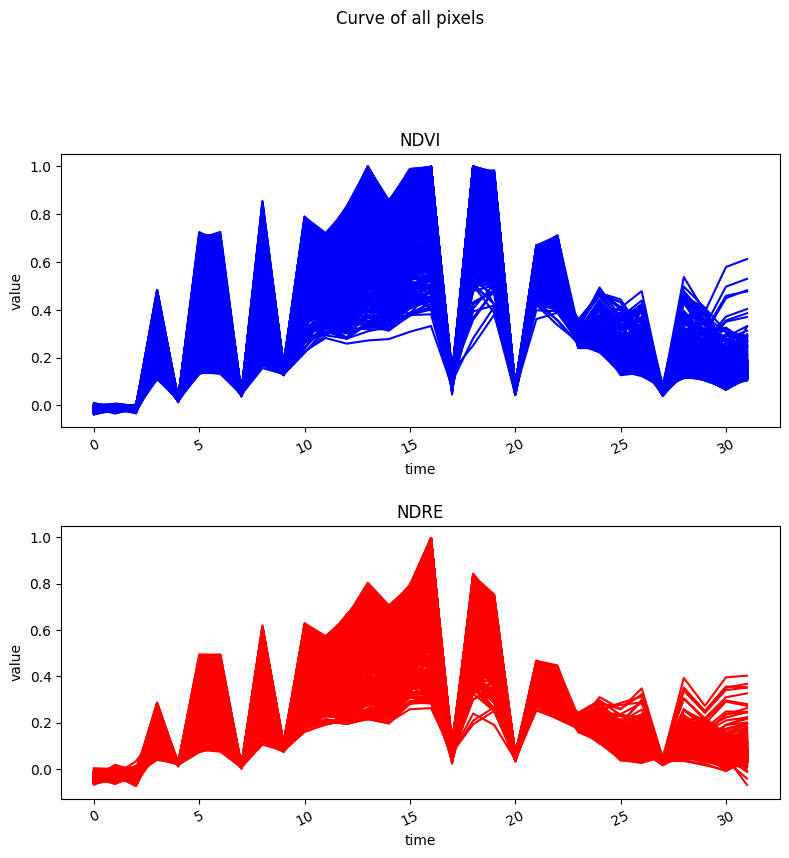

In [23]:
'''validePixelNDVI4 = np.zeros([57,43,74])
#validePixelNDRE = []
for a in range(Allpixelndvi4.shape[1]):
    for b in range(Allpixelndvi4.shape[2]):
        if(not np.isnan(np.sum(Allpixelndvi4[:,a,b]))):
            validePixelNDVI4[:,a,b] = Allpixelndvi4[:,a,b]'''

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9, 9))
fig.suptitle('Curve of all pixels')
fig.tight_layout(pad=5.0)
plt.sca(axs[0])
plt.title('NDVI')
plt.xticks(rotation=25) # Needed for rotating the date labels
validePixelNDVI_4 = []
validePixelNDRE_4 = []
for a in range(NDVI_cut_4.shape[1]):
    for b in range(NDVI_cut_4.shape[2]):
        if(np.sum(NDVI_cut_4[:,a,b] != 0)):
            validePixelNDVI_4.append(NDVI_cut_4[:,a,b])
            validePixelNDRE_4.append(NDRE_cut_4[:,a,b])
        #axs.plot(date,NDVI[:,a,b],color='blue')

for a in range(len(validePixelNDVI_4)):
    axs[0].plot(range(32),validePixelNDVI_4[a],color='blue')
    axs[0].set_xlabel("time")
    axs[0].set_ylabel("value")

for a in range(len(validePixelNDRE_4)):
    axs[1].plot(range(32),validePixelNDRE_4[a],color='red')
    axs[1].set_xlabel("time")
    axs[1].set_ylabel("value")

plt.sca(axs[1])
plt.title('NDRE')
plt.xticks(rotation=25)
plt.show()

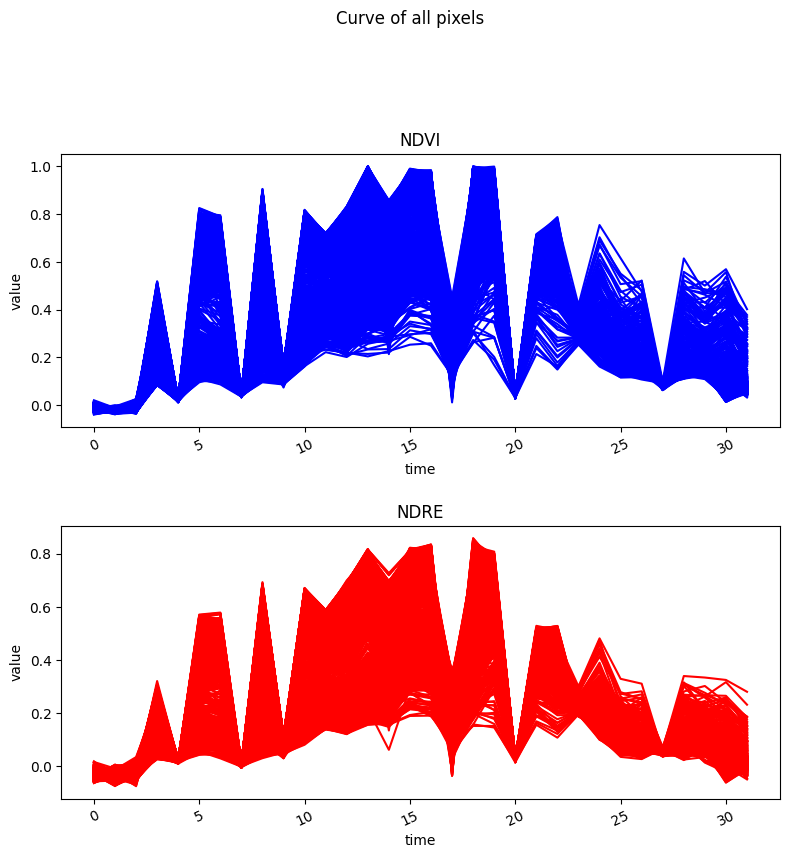

In [26]:
'''validePixelNDVI6 = np.zeros([57,52,84])
#validePixelNDRE = []
for a in range(Allpixelndvi6.shape[1]):
    for b in range(Allpixelndvi6.shape[2]):
        if(not np.isnan(np.sum(Allpixelndvi6[:,a,b]))):
            validePixelNDVI6[:,a,b] = Allpixelndvi6[:,a,b]'''

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9, 9))
fig.suptitle('Curve of all pixels')
fig.tight_layout(pad=5.0)
plt.sca(axs[0])
plt.title('NDVI')
plt.xticks(rotation=25) # Needed for rotating the date labels
validePixelNDVI_6 = []
validePixelNDRE_6 = []
for a in range(NDVI_cut_6.shape[1]):
    for b in range(NDVI_cut_6.shape[2]):
        if(np.sum(NDVI_cut_6[:,a,b] != 0)):
            validePixelNDVI_6.append(NDVI_cut_6[:,a,b])
            validePixelNDRE_6.append(NDRE_cut_6[:,a,b])
        #axs.plot(date,NDVI[:,a,b],color='blue')

for a in range(len(validePixelNDVI_6)):
    axs[0].plot(range(32),validePixelNDVI_6[a],color='blue')
    axs[0].set_xlabel("time")
    axs[0].set_ylabel("value")

for a in range(len(validePixelNDRE_6)):
    axs[1].plot(range(32),validePixelNDRE_6[a],color='red')
    axs[1].set_xlabel("time")
    axs[1].set_ylabel("value")

plt.sca(axs[1])
plt.title('NDRE')
plt.xticks(rotation=25)
plt.show()

In [28]:
#print(validePixelNDVI4)
print(np.array(validePixelNDVI_6).shape)

(4368, 32)


248860


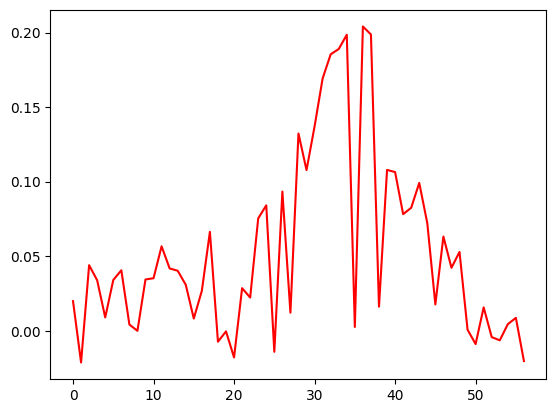

In [17]:
print(np.count_nonzero(Allpixelndvi6))
plt.plot(Allpixelndvi6[:,30,30], color="red")

# Faccio lo smoothing delle serie temporali

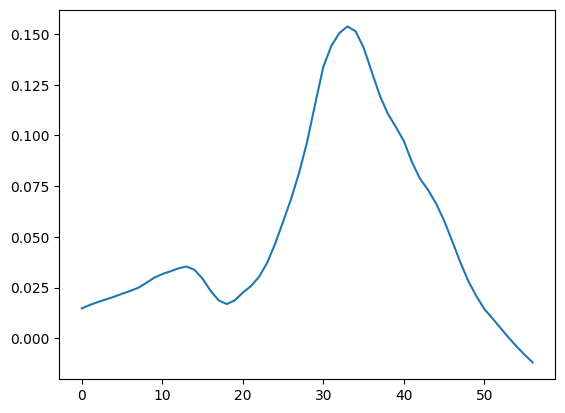

In [18]:
imageSmooth_6 = np.zeros([57, 52, 84])

for x in range(validePixelNDVI6.shape[1]):
    for y in range(validePixelNDVI6.shape[2]):
        imageSmooth_6[:,x,y] = smoother.smooth(validePixelNDVI6[:,x,y]).smooth_data[0]

plt.plot(imageSmooth_6[:,30,30])

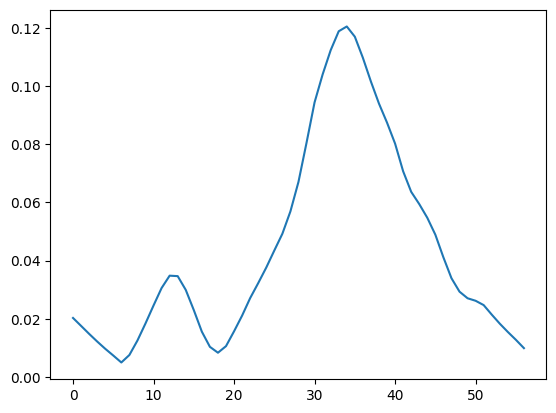

In [19]:
imageSmooth_4 = np.zeros([57, 43, 74])

for x in range(validePixelNDVI4.shape[1]):
    for y in range(validePixelNDVI4.shape[2]):
        imageSmooth_4[:,x,y] = smoother.smooth(validePixelNDVI4[:,x,y]).smooth_data[0]

plt.plot(imageSmooth_4[:,20,60])

# Plot di tutte le curve

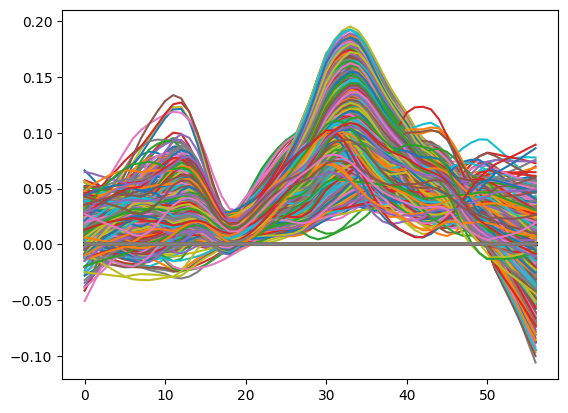

In [20]:
for x in range(imageSmooth_6.shape[1]):
    for y in range(imageSmooth_6.shape[2]):
        plt.plot(imageSmooth_6[:,x,y])